Amare Diotte
Data Engineering
343 Data Analysis
EDA Class Example

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("laptops.csv")

# see types of series in the data set:
print(df.dtypes)


Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object


based on the data types, this looks good, the series I would expect to be numbers are floats or ints. Screen size is an object, I'm assuming that is a categorical variable and not a continuous number

In [4]:
# confirming screen object is category
df['Screen'].describe()



count         238
unique          2
top       Full HD
freq          161
Name: Screen, dtype: object

In [5]:
df.describe()


,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


some issues with data - price is too many decimal places, maybe rounding up to the integer on RAM_GB is a good idea, it loos like some laptops don't have a weight

In [6]:

# there are also some nulls present in Screen_size_cm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [7]:
# preview a few records at the beginning
df.head(4)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


In [8]:
# preview a few records at the end
df.tail(4)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883
237,237,Toshiba,3,Full HD,2,1,5,35.560,2.3,8,256,1.95,1499


In [13]:
# find data values by row index 
print(df.at[157, 'Screen_Size_cm'])
print(df.at[158, 'Screen_Size_cm'])

39.624
35.56


In [15]:
# find data values by column and row positions
df.iat[4,4]

2

In [21]:
# descriptive statistics - value_counts()
manufacturer_counts = df['Manufacturer'].value_counts()

manufacturer_counts

Manufacturer
Dell       71
Lenovo     52
HP         49
Acer       19
Asus       18
Toshiba    17
Samsung     5
MSI         4
Huawei      1
Razer       1
Xiaomi      1
Name: count, dtype: int64

In [8]:
from numpy import place
import pandas as pd
df_cars2 = pd.read_csv("automobileEDA.csv")
# print(df_cars2.dtypes)
drive_wheels_counts=df_cars2['drive-wheels'].value_counts()  #calculate a count of the unique values for a given field
# print(type(drive_wheels_counts)) #results in a series
# print(drive_wheels_counts.name)  #testing get name from series

drive_wheels_counts=df_cars2['drive-wheels'].value_counts()
newdf = pd.DataFrame(drive_wheels_counts)  #Create a new Dataframe from the series
print(newdf.info()) #what is the name of the field?
print("Now we can rename the column count to value_counts in place")
newdf.rename(columns={'count':'value_counts'}, inplace=True) 
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, fwd to 4wd
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes
None
Now we can rename the column count to value_counts in place
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, fwd to 4wd
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   value_counts  3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes
None


<Axes: xlabel='GPU', ylabel='Price'>

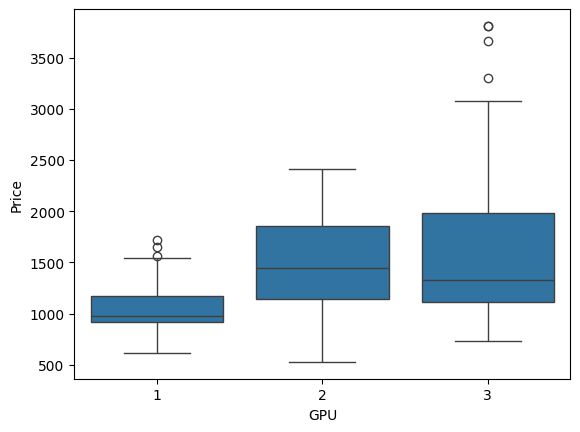

In [22]:
sns.boxplot(x="GPU", y="Price", data=df)
# box plot to show how price relates to number of GPU
# 3 GPU laptops have a wide range of prices

<Axes: xlabel='Weight_kg', ylabel='Price'>

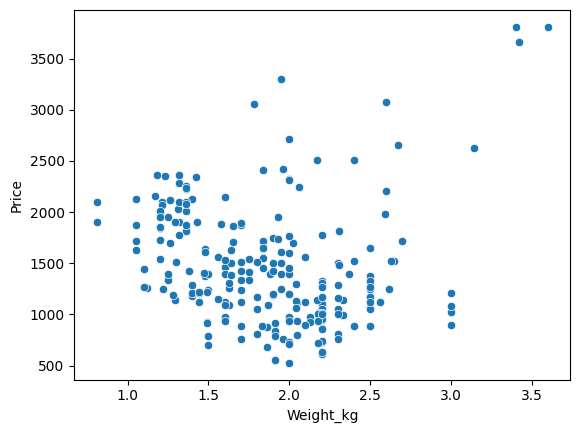

In [27]:
sns.scatterplot(x="Weight_kg", y="Price", data=df)
# comparing weight to price